In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(verbose=False, 
           classifier='kunetplus2d',
           discriminator='cnnplus',
           filter_num= [16, 32, 64, 128, 256, 512],
           stack_num_down=3, 
           stack_num_up=3, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=True, 
           pool=True, 
           unpool=False, 
           deep_supervision=False,
           weights=None, 
           freeze_backbone=True, 
           freeze_batch_norm=True,
           optimizer=None, 
           loss=None, 
           metric=None           
          )

*** GP2  KUNetPlus2D ***
Working directory: /tmp/tmp3ulrxntbGP2


In [5]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
images.shape

(10000, 512, 512, 1)

In [7]:
masks.shape

(10000, 512, 512, 1)

In [8]:
R.run(images=images, masks=masks, runs=8, use_multi_gpu=True)

Number of devices: 2
Weights OK!
******
Loop 1
Epoch 1/100
8/8 [==============================] - 28s 2s/step - loss: 0.5131 - dice_coeff: 0.1470 - val_loss: 0.6843 - val_dice_coeff: 0.1627
Epoch 2/100
8/8 [==============================] - 12s 2s/step - loss: 0.4926 - dice_coeff: 0.1515 - val_loss: 0.6750 - val_dice_coeff: 0.1623
Epoch 3/100
8/8 [==============================] - 12s 2s/step - loss: 0.4820 - dice_coeff: 0.1552 - val_loss: 0.6672 - val_dice_coeff: 0.1621
Epoch 4/100
8/8 [==============================] - 11s 2s/step - loss: 0.4687 - dice_coeff: 0.1616 - val_loss: 0.6609 - val_dice_coeff: 0.1618
Epoch 5/100
8/8 [==============================] - 12s 2s/step - loss: 0.4497 - dice_coeff: 0.1730 - val_loss: 0.6551 - val_dice_coeff: 0.1616
Epoch 6/100
8/8 [==============================] - 12s 2s/step - loss: 0.4218 - dice_coeff: 0.1974 - val_loss: 0.6493 - val_dice_coeff: 0.1614
Epoch 7/100
8/8 [==============================] - 12s 2s/step - loss: 0.3907 - dice_coeff: 0.2

8/8 [==============================] - 12s 2s/step - loss: 0.1357 - dice_coeff: 0.5858 - val_loss: 0.1813 - val_dice_coeff: 0.5098
Epoch 58/100
8/8 [==============================] - 12s 2s/step - loss: 0.1344 - dice_coeff: 0.5877 - val_loss: 0.1801 - val_dice_coeff: 0.5075
Epoch 59/100
8/8 [==============================] - 12s 2s/step - loss: 0.1336 - dice_coeff: 0.5890 - val_loss: 0.1841 - val_dice_coeff: 0.4924
Epoch 60/100
8/8 [==============================] - 12s 2s/step - loss: 0.1321 - dice_coeff: 0.5914 - val_loss: 0.1751 - val_dice_coeff: 0.5160
Epoch 61/100
8/8 [==============================] - 12s 2s/step - loss: 0.1316 - dice_coeff: 0.5926 - val_loss: 0.1697 - val_dice_coeff: 0.5294
Epoch 62/100
8/8 [==============================] - 12s 2s/step - loss: 0.1298 - dice_coeff: 0.5964 - val_loss: 0.1697 - val_dice_coeff: 0.5341
Epoch 63/100
8/8 [==============================] - 12s 2s/step - loss: 0.1294 - dice_coeff: 0.5970 - val_loss: 0.1663 - val_dice_coeff: 0.5389
Epoch

In [9]:
R.classifier_scores

[[0.12479136139154434, 0.6150396466255188]]

In [10]:
R.discriminator_scores

[[8.80250072479248, 0.47833332419395447]]

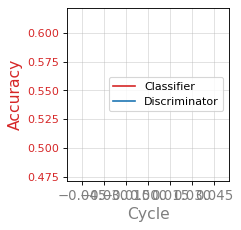

In [11]:
R.plot()